In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree 

## Read the file

In [2]:
fdata=pd.read_csv('../Datasets/Fraud_check.csv')

In [3]:
fdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [18]:
fdata.rename(columns={'Marital.Status':'Mstatus'},inplace=True)

In [19]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Mstatus          600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [20]:
fdata.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [21]:
fdata.isnull().sum()

Undergrad          0
Mstatus            0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [22]:
fdata.duplicated().sum()

0

In [23]:
data=fdata.copy()

In [24]:
data.head()

,Undergrad,Mstatus,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [25]:
le=LabelEncoder()

enc=le.fit_transform(data['Mstatus'])

In [32]:
data.head()

,Undergrad,Mstatus,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,2,68833,50047,10,YES,Good
1,YES,0,33700,134075,18,YES,Good
2,NO,1,36925,160205,30,YES,Good
3,YES,2,50190,193264,15,YES,Good
4,NO,1,81002,27533,28,NO,Good


In [33]:
data['Mstatus']=enc

In [34]:
data.head()

,Undergrad,Mstatus,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,2,68833,50047,10,YES,Good
1,YES,0,33700,134075,18,YES,Good
2,NO,1,36925,160205,30,YES,Good
3,YES,2,50190,193264,15,YES,Good
4,NO,1,81002,27533,28,NO,Good


In [35]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [36]:
data.head()

,Undergrad,Mstatus,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,2,68833,50047,10,YES,Good
1,YES,0,33700,134075,18,YES,Good
2,NO,1,36925,160205,30,YES,Good
3,YES,2,50190,193264,15,YES,Good
4,NO,1,81002,27533,28,NO,Good


## Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [47]:
ent=le.fit_transform(data['TaxInc'])
enu=le.fit_transform(data['Undergrad'])
enurban=le.fit_transform(data['Urban'])

In [48]:
data['TaxInc']=ent
data['Undergrad']=enu
data['Urban']=enurban

In [49]:
data

,Undergrad,Mstatus,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


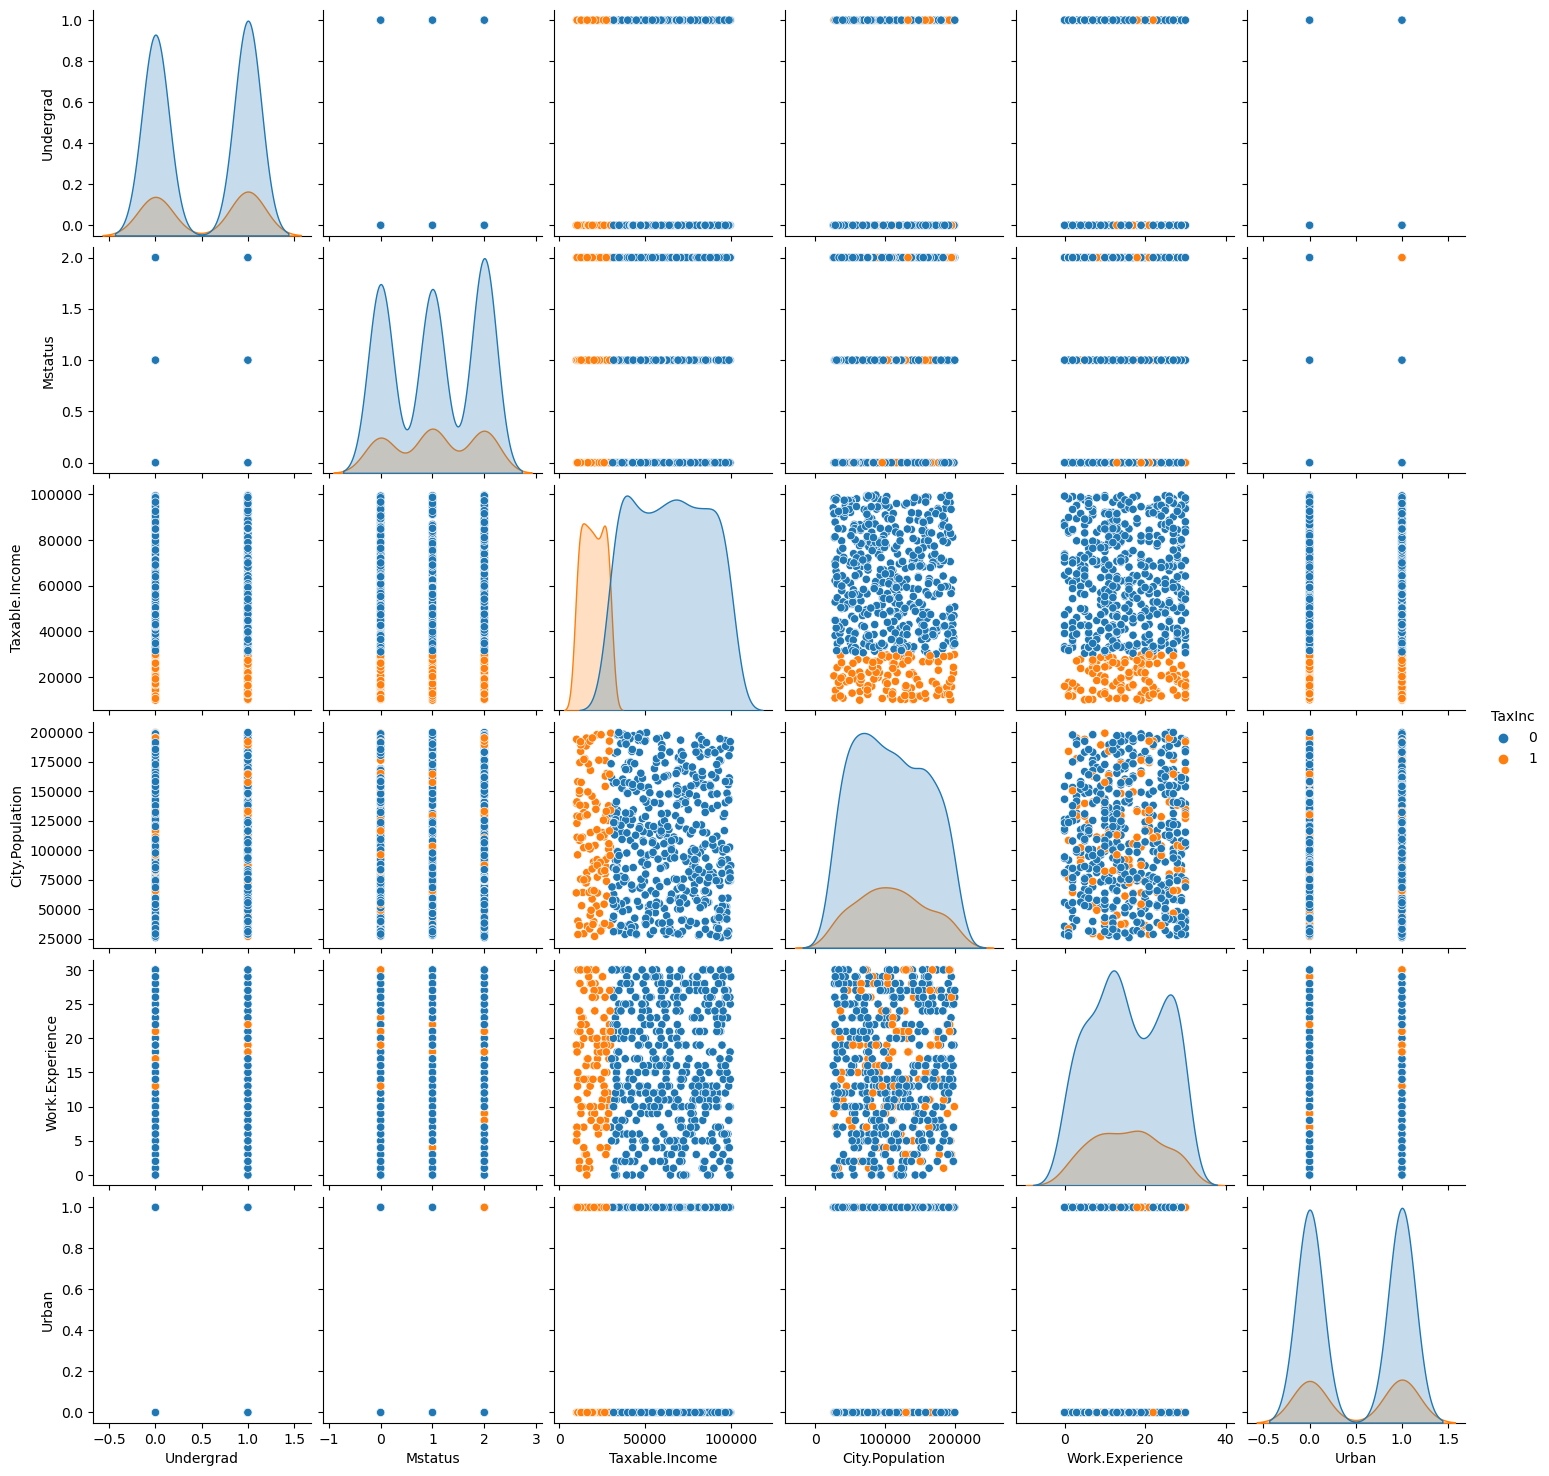

In [50]:
import seaborn as sns
sns.pairplot(data=data, hue = 'TaxInc')

In [51]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [52]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']:])
df_norm.tail(10)

,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
590,0.368405,0.341473,0.466667,1.0,0.0
591,0.194061,0.615406,0.600000,1.0,1.0
592,0.648869,0.283703,0.533333,0.0,0.0
593,0.834360,0.610256,0.333333,1.0,0.0
594,0.416901,0.412341,0.300000,1.0,0.0
595,0.740236,0.078811,0.233333,1.0,0.0
596,0.669122,0.170058,0.066667,1.0,0.0
597,0.416566,0.737240,0.000000,1.0,0.0
598,0.988540,0.886810,0.566667,0.0,0.0
599,0.965408,0.760683,0.533333,0.0,0.0


In [54]:
# Declaring features & target
X = df_norm.drop(['TaxInc'], axis=1)
y = df_norm['TaxInc']

In [55]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((480, 4), (120, 4), (480,), (120,))

## Building Decision Tree Classifier using Entropy Criteria

In [58]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Get training and testing metrics

In [60]:
train_pred = model.predict(Xtrain)

In [61]:
confusion_matrix(ytrain, train_pred)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [62]:
print(classification_report(ytrain, train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       381
         1.0       1.00      1.00      1.00        99

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [64]:
from sklearn import tree

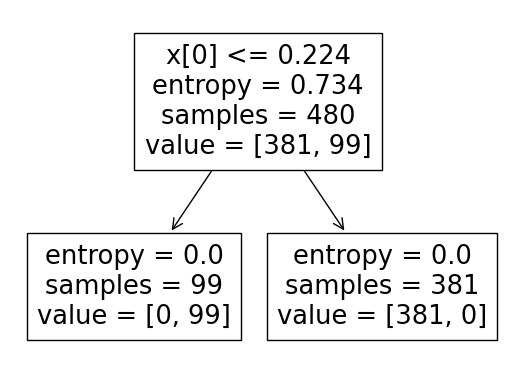

In [66]:
#PLot the decision tree
tree.plot_tree(model);


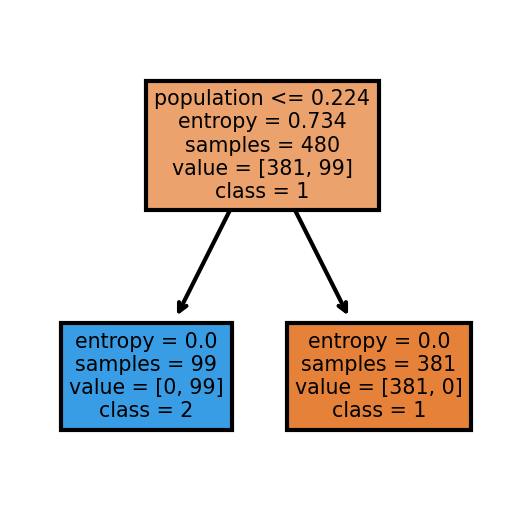

In [68]:
fn=['population','experience','Mstatus','Urban']
cn=['1', '2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [69]:
#Predicting on test data
preds = model.predict(Xtest) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0.0    95
1.0    25
dtype: int64

In [70]:
pd.crosstab(ytest,preds)

col_0,0.0,1.0
TaxInc,,
0.0,95,0
1.0,0,25


In [72]:
# Accuracy 
np.mean(preds==ytest)

1.0